In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/5e-40.3-solana_tft-epoch34-val_loss0.7376.ckpt/transformers/default/1/solana_tft-epoch34-val_loss0.7376.ckpt
/kaggle/input/training-and-testing-datasets-v3/X_valid_selected.csv
/kaggle/input/training-and-testing-datasets-v3/step7_y_valid_scaled.csv
/kaggle/input/training-and-testing-datasets-v3/step7_y_train_scaled.csv
/kaggle/input/training-and-testing-datasets-v3/X_train_selected.csv
/kaggle/input/training-data-robust-scaler-models/other/default/1/target_scaler_close.pkl
/kaggle/input/training-data-robust-scaler-models/other/default/1/robust_scaler_features.pkl
/kaggle/input/og-solana-price-dataset/Solana_Price_data.csv
/kaggle/input/solana-tft-epoch64-val-loss0-7466-ckpt/solana_tft-epoch64-val_loss0.7466.ckpt


In [2]:
!pip install torch torchaudio torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.2 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.9.90
    Uninstalling nvidia-curand-cu12-1

In [3]:
!pip install pytorch-forecasting
!pip install pytorch_optimizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.7/197.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.8/240.8 kB 10.6 MB/s eta 0:00:00


In [4]:
import torch
print(torch.__version__)

2.5.1+cu124


In [5]:
import pytorch_forecasting
print(pytorch_forecasting.__version__)

import pytorch_lightning
print(pytorch_lightning.__version__)


1.3.0
2.5.1


In [6]:
import pytorch_forecasting
import os

print(pytorch_forecasting.__file__)


/usr/local/lib/python3.11/dist-packages/pytorch_forecasting/__init__.py


In [7]:
!head -n 20 /usr/local/lib/python3.11/dist-packages/pytorch_forecasting/models/base_model.py


"""
Timeseries models share a number of common characteristics. This module implements these in a common base class.
"""  # noqa: E501

from collections import namedtuple
from copy import deepcopy
import inspect
import logging
import os
from typing import Any, Callable, Dict, Iterable, List, Literal, Optional, Tuple, Union
import warnings

import lightning.pytorch as pl
from lightning.pytorch import LightningModule, Trainer
from lightning.pytorch.callbacks import BasePredictionWriter, LearningRateFinder
from lightning.pytorch.trainer.states import RunningStage
from lightning.pytorch.utilities.parsing import get_init_args
import numpy as np
from numpy import iterable
import pandas as pd


In [8]:
!sed -i 's/from lightning.pytorch/from pytorch_lightning/' /usr/local/lib/python3.11/dist-packages/pytorch_forecasting/models/base_model.py


In [9]:
!head -n 20 /usr/local/lib/python3.11/dist-packages/pytorch_forecasting/models/base_model.py


"""
Timeseries models share a number of common characteristics. This module implements these in a common base class.
"""  # noqa: E501

from collections import namedtuple
from copy import deepcopy
import inspect
import logging
import os
from typing import Any, Callable, Dict, Iterable, List, Literal, Optional, Tuple, Union
import warnings

import lightning.pytorch as pl
from pytorch_lightning import LightningModule, Trainer
from pytorch_lightning.callbacks import BasePredictionWriter, LearningRateFinder
from pytorch_lightning.trainer.states import RunningStage
from pytorch_lightning.utilities.parsing import get_init_args
import numpy as np
from numpy import iterable
import pandas as pd


In [ ]:
import os
os.kill(os.getpid(), 9)


In [1]:
import copy
from pathlib import Path
import warnings
import holidays
import seaborn as sns
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
import numpy as np
import pandas as pd
import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning import Trainer
import torch
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
print(DEVICE)

cuda


In [3]:
from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer, NaNLabelEncoder
from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters
import random
import gc
# import tensorflow as tf

random.seed(30)
np.random.seed(30)
# tf.random.set_seed(30)
torch.manual_seed(30)
torch.cuda.manual_seed(30)

In [119]:
df_X_train = pd.read_csv('/kaggle/input/training-and-testing-datasets-v3/X_train_selected.csv')
df_X_valid = pd.read_csv('/kaggle/input/training-and-testing-datasets-v3/X_valid_selected.csv')
df_y_train = pd.read_csv('/kaggle/input/training-and-testing-datasets-v3/step7_y_train_scaled.csv')
df_y_valid = pd.read_csv('/kaggle/input/training-and-testing-datasets-v3/step7_y_valid_scaled.csv')

In [120]:
# Example for your dataset
df_X_train['date'] = pd.to_datetime(df_X_train['date'], utc=True)
df_X_valid['date'] = pd.to_datetime(df_X_valid['date'], utc=True)
df_y_train['date'] = pd.to_datetime(df_y_train['date'], utc=True)
df_y_valid['date'] = pd.to_datetime(df_y_valid['date'], utc=True)


In [121]:
# Combine all dates to ensure continuous time_idx across train/valid
all_dates = pd.concat([df_X_train[['date']], df_X_valid[['date']]]).drop_duplicates().sort_values('date').reset_index(drop=True)
all_dates['time_idx'] = range(len(all_dates))

In [122]:
# Merge time_idx back into datasets
df_X_train = df_X_train.merge(all_dates, on='date', how='left')
df_X_valid = df_X_valid.merge(all_dates, on='date', how='left')
df_y_train = df_y_train.merge(all_dates, on='date', how='left')
df_y_valid = df_y_valid.merge(all_dates, on='date', how='left')


In [124]:
# Add constant series column
df_X_train['series'] = 0
df_X_valid['series'] = 0
df_y_train['series'] = 0
df_y_valid['series'] = 0


In [125]:
# Double-check
print(df_X_train[['date', 'time_idx', 'series']].head())
print(df_X_valid[['date', 'time_idx', 'series']].head())

                       date  time_idx  series
0 2021-07-19 00:00:00+00:00         0       0
1 2021-07-20 00:00:00+00:00         1       0
2 2021-07-21 00:00:00+00:00         2       0
3 2021-07-22 00:00:00+00:00         3       0
4 2021-07-23 00:00:00+00:00         4       0
                       date  time_idx  series
0 2024-07-16 00:00:00+00:00      1093       0
1 2024-07-17 00:00:00+00:00      1094       0
2 2024-07-18 00:00:00+00:00      1095       0
3 2024-07-19 00:00:00+00:00      1096       0
4 2024-07-20 00:00:00+00:00      1097       0


In [126]:
print(df_X_train.columns)
print(len(df_X_train.columns))
print(df_X_train.dtypes)

df_X_train.head()

Index(['date', 'BB_Middle_20', 'Close_Lag_3', 'Volume_SMA_20', 'EMA_200',
       'Volume_Lag_1', 'SMA_50_Above_SMA_200', 'MACD_Line', 'EMA_20',
       'Close_Lag_7', 'SMA_50', 'Volume_Lag_5', 'Price_Above_SMA_200',
       'Volume_SMA_100', 'Volume_SMA_50', 'Open', 'Volume_Lag_7',
       'Volume_SMA_10', 'EMA_100', 'ATH_Drawdown', 'Volume_Lag_21', '20d_High',
       'Close_Lag_1', 'Low', 'BB_Upper_20', 'Log_Volume', 'Volume_Lag_14',
       'SMA_5', 'Close_Lag_21', 'Volume_Lag_3', 'SMA_20', 'EMA_10',
       'Volume_SMA_200', 'Volume_SMA_5', '20d_Low', 'BB_Lower_20', 'Volume',
       'ATR_14', 'SMA_200', 'EMA_5', 'Close_Lag_14', 'MACD_Signal', 'SMA_10',
       'EMA_50', 'Resistance_Level', 'Close_Lag_2', 'Volume_Lag_2',
       'Week_of_Year', 'High', 'SMA_100', 'Log_Close', 'Support_Level',
       'Close_Lag_5', 'time_idx', 'series'],
      dtype='object')
55
date                    datetime64[ns, UTC]
BB_Middle_20                        float64
Close_Lag_3                         float64

,date,BB_Middle_20,Close_Lag_3,Volume_SMA_20,EMA_200,Volume_Lag_1,SMA_50_Above_SMA_200,MACD_Line,EMA_20,Close_Lag_7,...,Close_Lag_2,Volume_Lag_2,Week_of_Year,High,SMA_100,Log_Close,Support_Level,Close_Lag_5,time_idx,series
0,2021-07-19 00:00:00+00:00,-0.110520,-0.160366,-0.661166,-0.374807,-0.570343,0.0,-0.434588,-0.123799,-0.116248,...,-0.155541,-0.540339,0.08,-0.167676,-0.086657,-0.334094,-0.142096,-0.111047,0,0
1,2021-07-20 00:00:00+00:00,-0.116932,-0.155795,-0.665286,-0.375053,-0.504169,0.0,-0.491919,-0.130513,-0.132302,...,-0.156300,-0.570185,0.08,-0.182992,-0.087142,-0.359297,-0.167266,-0.137971,1,0
2,2021-07-21 00:00:00+00:00,-0.120485,-0.156557,-0.663165,-0.374909,-0.478257,0.0,-0.477325,-0.133456,-0.110638,...,-0.176906,-0.504021,0.08,-0.160997,-0.087347,-0.285657,-0.167266,-0.159816,2,0
3,2021-07-22 00:00:00+00:00,-0.123826,-0.177221,-0.665143,-0.374636,-0.406676,0.0,-0.441922,-0.135053,-0.137814,...,-0.186782,-0.478112,0.08,-0.154497,-0.087322,-0.262558,-0.167266,-0.155217,3,0
4,2021-07-23 00:00:00+00:00,-0.127008,-0.187125,-0.663026,-0.374267,-0.502786,0.0,-0.395357,-0.135708,-0.159865,...,-0.156680,-0.406542,0.08,-0.149866,-0.087091,-0.246021,-0.167266,-0.155984,4,0


In [127]:
print(df_X_valid.columns)
print(len(df_X_valid.columns))
print(df_X_valid.dtypes)

df_X_valid.head()

Index(['date', 'BB_Middle_20', 'Close_Lag_3', 'Volume_SMA_20', 'EMA_200',
       'Volume_Lag_1', 'SMA_50_Above_SMA_200', 'MACD_Line', 'EMA_20',
       'Close_Lag_7', 'SMA_50', 'Volume_Lag_5', 'Price_Above_SMA_200',
       'Volume_SMA_100', 'Volume_SMA_50', 'Open', 'Volume_Lag_7',
       'Volume_SMA_10', 'EMA_100', 'ATH_Drawdown', 'Volume_Lag_21', '20d_High',
       'Close_Lag_1', 'Low', 'BB_Upper_20', 'Log_Volume', 'Volume_Lag_14',
       'SMA_5', 'Close_Lag_21', 'Volume_Lag_3', 'SMA_20', 'EMA_10',
       'Volume_SMA_200', 'Volume_SMA_5', '20d_Low', 'BB_Lower_20', 'Volume',
       'ATR_14', 'SMA_200', 'EMA_5', 'Close_Lag_14', 'MACD_Signal', 'SMA_10',
       'EMA_50', 'Resistance_Level', 'Close_Lag_2', 'Volume_Lag_2',
       'Week_of_Year', 'High', 'SMA_100', 'Log_Close', 'Support_Level',
       'Close_Lag_5', 'time_idx', 'series'],
      dtype='object')
55
date                    datetime64[ns, UTC]
BB_Middle_20                        float64
Close_Lag_3                         float64

,date,BB_Middle_20,Close_Lag_3,Volume_SMA_20,EMA_200,Volume_Lag_1,SMA_50_Above_SMA_200,MACD_Line,EMA_20,Close_Lag_7,...,Close_Lag_2,Volume_Lag_2,Week_of_Year,High,SMA_100,Log_Close,Support_Level,Close_Lag_5,time_idx,series
0,2024-07-16 00:00:00+00:00,1.074953,0.941244,0.398186,0.938473,0.611659,0.0,0.384595,1.062567,0.953772,...,0.993163,0.324356,0.08,1.042565,1.174241,0.758558,1.152084,0.888761,1093,0
1,2024-07-17 00:00:00+00:00,1.078146,0.996191,0.383122,0.941270,0.839788,0.0,0.512088,1.073255,0.959478,...,1.105403,0.611646,0.08,1.053161,1.171476,0.739626,1.152084,0.925553,1094,0
2,2024-07-18 00:00:00+00:00,1.088487,1.108752,0.373930,0.944491,0.448225,0.0,0.669015,1.086578,0.898549,...,1.115943,0.839742,0.08,1.033660,1.170036,0.753289,1.152084,0.948548,1095,0
3,2024-07-19 00:00:00+00:00,1.104014,1.119322,0.438735,0.948901,0.342079,0.0,0.953842,1.108508,0.935687,...,1.067040,0.448236,0.08,1.129475,1.169581,0.788686,1.152084,1.003833,1096,0
4,2024-07-20 00:00:00+00:00,1.118504,1.070279,0.447643,0.953813,1.132876,0.0,1.242203,1.132773,0.958897,...,1.102175,0.342105,0.08,1.153161,1.169718,0.803870,1.152084,1.117083,1097,0


In [128]:
print(df_y_train.columns)
print(len(df_y_train.columns))
print(df_y_train.dtypes)

df_y_train.head()

Index(['date', 'Close', 'time_idx', 'series'], dtype='object')
4
date        datetime64[ns, UTC]
Close                   float64
time_idx                  int64
series                    int64
dtype: object


,date,Close,time_idx,series
0,2021-07-19 00:00:00+00:00,-0.178160,0,0
1,2021-07-20 00:00:00+00:00,-0.187892,1,0
2,2021-07-21 00:00:00+00:00,-0.158230,2,0
3,2021-07-22 00:00:00+00:00,-0.148124,3,0
4,2021-07-23 00:00:00+00:00,-0.140638,4,0


In [129]:
print(df_y_valid.columns)
print(len(df_y_valid.columns))
print(df_y_valid.dtypes)

df_y_valid.head()

Index(['date', 'Close', 'time_idx', 'series'], dtype='object')
4
date        datetime64[ns, UTC]
Close                   float64
time_idx                  int64
series                    int64
dtype: object


,date,Close,time_idx,series
0,2024-07-16 00:00:00+00:00,1.095817,1093,0
1,2024-07-17 00:00:00+00:00,1.047628,1094,0
2,2024-07-18 00:00:00+00:00,1.082249,1095,0
3,2024-07-19 00:00:00+00:00,1.175821,1096,0
4,2024-07-20 00:00:00+00:00,1.217741,1097,0


# **<------DATA LOADING AS TIMESERIES DATA SATRTS HERE------>**

In [130]:
time_idx               = "time_idx"      # integer index for each time step
group_ids              = ["series"]      # your group identifier (only one series here)

target                  = "Close"        # the variable we’re forecasting

static_categoricals     = ["series"]     # series ID is constant per group
static_reals            = []             # no other truly static numeric covariates

time_varying_known_reals = [
    time_idx,
    "Week_of_Year"
]
time_varying_known_categoricals = []

time_varying_unknown_reals = [
    "Open", "High", "Low", "Volume",
    "Volume_Lag_1", "Volume_Lag_2", "Volume_Lag_3",
    "Volume_Lag_5", "Volume_Lag_7", "Volume_Lag_14", "Volume_Lag_21",
    "Volume_SMA_5", "Volume_SMA_10", "Volume_SMA_20",
    "Volume_SMA_50", "Volume_SMA_100", "Volume_SMA_200",
    "Log_Volume",
    "Close_Lag_1", "Close_Lag_2", "Close_Lag_3",
    "Close_Lag_5", "Close_Lag_7", "Close_Lag_14", "Close_Lag_21",
    "Log_Close",
    "SMA_5", "SMA_10", "SMA_20", "SMA_50", "SMA_100", "SMA_200",
    "EMA_5", "EMA_10", "EMA_20", "EMA_50", "EMA_100", "EMA_200",
    "MACD_Line", "MACD_Signal",
    "BB_Lower_20", "BB_Middle_20", "BB_Upper_20",
    "ATR_14",
    "20d_High", "20d_Low",
    "Support_Level", "Resistance_Level",
    "ATH_Drawdown",
    "Price_Above_SMA_200", "SMA_50_Above_SMA_200"
]

# time_varying_unknown_reals = [
#     "Open", "High", "Low", "Volume",
#     "Volume_Lag_1", "Volume_Lag_2", "Volume_Lag_3",
#     "Volume_SMA_5", "Volume_SMA_20", "Volume_SMA_50",
#     "Log_Volume",
#     "Close_Lag_1", "Close_Lag_2", "Close_Lag_3", "Close_Lag_7", 
#     "Log_Close",
#     "SMA_5", "SMA_20", "SMA_50", "SMA_200",
#     "EMA_5", "EMA_20", "EMA_50",
#     "MACD_Line", "MACD_Signal",
#     "BB_Lower_20", "BB_Middle_20", "BB_Upper_20",
#     "ATR_14",
#     "20d_High", "20d_Low",
#     "Support_Level", "Resistance_Level",
#     "ATH_Drawdown",
#     "Price_Above_SMA_200", "SMA_50_Above_SMA_200"
# ]

time_varying_unknown_categoricals = []

In [131]:
# Check for missing days in your time_idx
all_time_idx = pd.concat([df_X_train['time_idx'], df_X_valid['time_idx']])
missing = set(range(all_time_idx.min(), all_time_idx.max()+1)) - set(all_time_idx)
print(f"Missing time_idx values: {sorted(missing)}")


Missing time_idx values: []


In [132]:
# Merge X and y on 'date', 'time_idx', 'series'
df_train = pd.merge(
    df_X_train,
    df_y_train[['date', 'Close', 'time_idx', 'series']],
    on=['date', 'time_idx', 'series'],
    how='left'
)

In [133]:
df_valid = pd.merge(
    df_X_valid,
    df_y_valid[['date', 'Close', 'time_idx', 'series']],
    on=['date', 'time_idx', 'series'],
    how='left'
)


In [134]:
print(f"Missing values in training data: {df_train.isna().sum().sum()}")
print(f"Missing values in validation data: {df_valid.isna().sum().sum()}")

if df_train.isna().sum().sum() > 0 or df_valid.isna().sum().sum() > 0:
    print("Filling missing values...")
    df_train = df_train.fillna(method='ffill').fillna(method='bfill')
    df_valid = df_valid.fillna(method='ffill').fillna(method='bfill')

Missing values in training data: 0
Missing values in validation data: 0


In [135]:
assert "Close" in df_train.columns, "Target column missing!"
assert "Close" in df_valid.columns, "Target column missing!"


In [136]:
assert df_train['Close'].notnull().all(), "NaN in target after merging train"
assert df_valid['Close'].notnull().all(), "NaN in target after merging valid"


In [138]:
# Fix the datatype for 'series' in both training and validation sets
df_train["series"] = df_train["series"].astype(str)
df_valid["series"] = df_valid["series"].astype(str)


In [139]:
# For TimeSeriesDataSet
from pytorch_forecasting import TimeSeriesDataSet

max_encoder_length = 60  # 60 days of history
max_prediction_length = 1
# Example setup
training_dataset = TimeSeriesDataSet(
    df_train,  # or merged df_X_train + df_y_train on ['date', 'time_idx', 'series']
    time_idx=time_idx,
    target=target,
    group_ids=group_ids,
    min_encoder_length=max_encoder_length,  
    max_encoder_length=max_encoder_length,
    min_prediction_length=max_prediction_length,
    max_prediction_length=max_prediction_length,
    static_categoricals=static_categoricals,
    static_reals=static_reals,
    time_varying_known_categoricals=time_varying_known_categoricals,
    time_varying_known_reals=time_varying_known_reals,
    time_varying_unknown_categoricals=time_varying_unknown_categoricals,
    time_varying_unknown_reals=time_varying_unknown_reals,
    target_normalizer=None,  # if already scaled
    add_relative_time_idx=True,
    add_target_scales=True,
    add_encoder_length=True,
    allow_missing_timesteps=False
)


In [140]:
# validation_dataset = TimeSeriesDataSet(
#     df_valid,  # or merged df_X_train + df_y_train on ['date', 'time_idx', 'series']
#     time_idx=time_idx,
#     target=target,
#     group_ids=group_ids,
#     min_encoder_length=60,  
#     max_encoder_length=60,
#     min_prediction_length=1,
#     max_prediction_length=1,
#     static_categoricals=static_categoricals,
#     static_reals=static_reals,
#     time_varying_known_categoricals=time_varying_known_categoricals,
#     time_varying_known_reals=time_varying_known_reals,
#     time_varying_unknown_categoricals=time_varying_unknown_categoricals,
#     time_varying_unknown_reals=time_varying_unknown_reals,
#     target_normalizer=None,  # if already scaled
#     add_relative_time_idx=True,
#     add_target_scales=True,
#     add_encoder_length=True,
#     allow_missing_timesteps=False
# )


# Create validation dataset from training dataset parameters for consistency
validation_dataset = TimeSeriesDataSet.from_dataset(
    training_dataset, 
    df_valid, 
    stop_randomization=True
)

In [141]:
print("training dataset:", training_dataset)
print("Number of sequences:", len(training_dataset))


training dataset: TimeSeriesDataSet[length=1033](
	time_idx='time_idx',
	target='Close',
	group_ids=['series'],
	weight=None,
	max_encoder_length=60,
	min_encoder_length=60,
	min_prediction_idx=0,
	min_prediction_length=1,
	max_prediction_length=1,
	static_categoricals=['series'],
	static_reals=[],
	time_varying_known_categoricals=[],
	time_varying_known_reals=['time_idx', 'Week_of_Year'],
	time_varying_unknown_categoricals=[],
	time_varying_unknown_reals=['Open', 'High', 'Low', 'Volume', 'Volume_Lag_1', 'Volume_Lag_2', 'Volume_Lag_3', 'Volume_Lag_5', 'Volume_Lag_7', 'Volume_Lag_14', 'Volume_Lag_21', 'Volume_SMA_5', 'Volume_SMA_10', 'Volume_SMA_20', 'Volume_SMA_50', 'Volume_SMA_100', 'Volume_SMA_200', 'Log_Volume', 'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_5', 'Close_Lag_7', 'Close_Lag_14', 'Close_Lag_21', 'Log_Close', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_50', 'SMA_100', 'SMA_200', 'EMA_5', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_100', 'EMA_200', 'MACD_Line', 'MACD_Signal', 'BB_L

In [142]:
print("Validation dataset:", validation_dataset)
print("Number of sequences:", len(validation_dataset))


Validation dataset: TimeSeriesDataSet[length=214](
	time_idx='time_idx',
	target='Close',
	group_ids=['series'],
	weight=None,
	max_encoder_length=60,
	min_encoder_length=60,
	min_prediction_idx=0,
	min_prediction_length=1,
	max_prediction_length=1,
	static_categoricals=['series'],
	static_reals=[],
	time_varying_known_categoricals=[],
	time_varying_known_reals=['time_idx', 'Week_of_Year'],
	time_varying_unknown_categoricals=[],
	time_varying_unknown_reals=['Open', 'High', 'Low', 'Volume', 'Volume_Lag_1', 'Volume_Lag_2', 'Volume_Lag_3', 'Volume_Lag_5', 'Volume_Lag_7', 'Volume_Lag_14', 'Volume_Lag_21', 'Volume_SMA_5', 'Volume_SMA_10', 'Volume_SMA_20', 'Volume_SMA_50', 'Volume_SMA_100', 'Volume_SMA_200', 'Log_Volume', 'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_5', 'Close_Lag_7', 'Close_Lag_14', 'Close_Lag_21', 'Log_Close', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_50', 'SMA_100', 'SMA_200', 'EMA_5', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_100', 'EMA_200', 'MACD_Line', 'MACD_Signal', 'BB_

In [143]:


# 3. Create DataLoaders
batch_size = 128  # or adjust based on GPU memory
num_workers = 4

# Training DataLoader
train_dataloader = training_dataset.to_dataloader(
    train=True,
    batch_size=batch_size,
    num_workers=num_workers,
    pin_memory=True
)

# Validation DataLoader
val_dataloader = validation_dataset.to_dataloader(
    train=False,
    batch_size=batch_size * 2,
    num_workers=num_workers,
    pin_memory=True
)



In [145]:
import pytorch_lightning as pl
from pytorch_forecasting import TemporalFusionTransformer, QuantileLoss
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor, ModelCheckpoint, TQDMProgressBar

In [162]:
# Set seed for reproducibility
pl.seed_everything(42)

# Define the TFT model
tft = TemporalFusionTransformer.from_dataset(
    training_dataset,
    hidden_size=128,               # Large hidden size for complex patterns
    attention_head_size=4,         # More attention heads
    dropout=0.3,                   # Regularization
    hidden_continuous_size=64,    # Size for continuous variables
    learning_rate=3e-4,            # Initial learning rate
    lstm_layers=2,                 # More LSTM layers for deep temporal patterns
    loss=QuantileLoss(quantiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),  # Quantile loss for probabilistic forecasts
    log_interval=0,               # Logging interval
    reduce_on_plateau_patience=5,  # Patience for learning rate reduction
    optimizer="adamw",            # Use "adam" if "ranger" causes issues
    weight_decay=1e-2,             # Add L2 regularization to prevent overfitting
)
# Callbacks
early_stop_callback = EarlyStopping(
    monitor="val_loss",            # Monitor validation loss for early stopping
    min_delta=1e-4,
    patience=15,
    verbose=True,
    mode="min"
)

lr_logger = LearningRateMonitor(logging_interval="epoch")

checkpoint_callback = ModelCheckpoint(
    dirpath="/kaggle/working/",
    filename="solana_tft-{epoch:02d}-{val_loss:.4f}",  # Save by val_loss
    save_top_k=3,
    verbose=True,
    monitor="val_loss",            # Monitor validation loss for checkpointing
    mode="min",
    save_last=True
)

progress_bar = TQDMProgressBar(refresh_rate=10)

In [163]:
import pytorch_lightning as pl
import torch

trainer = pl.Trainer(
    max_epochs=100,
    accelerator="gpu",
    devices=1,
    deterministic=False,
    benchmark=True,
    precision="32",  # or "16-mixed" for faster/lower memory if desired
    gradient_clip_val=0.5,
    callbacks=[early_stop_callback, lr_logger, checkpoint_callback, progress_bar],
    accumulate_grad_batches=1,
    log_every_n_steps=10,
    enable_progress_bar=True,
    enable_model_summary=True,
    max_time={"hours": 12},
    strategy="auto",
)

try:
    # You can keep this for safety in some notebook environments
    import torch.multiprocessing as mp
    mp.set_start_method('spawn', force=True)
    
    print("Starting training...")
    trainer.fit(
        tft,
        train_dataloaders=train_dataloader,
        val_dataloaders=val_dataloader  # <--- ADD THIS LINE!
    )
    print("Training completed successfully")
except Exception as e:
    print(f"Training error: {e}")
    trainer.save_checkpoint("solana_tft_error_recovery.ckpt")
    raise e

# Save the trained model
trainer.save_checkpoint("solana_tft_final_model.ckpt")
print("Model saved successfully")


INFO: GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /kaggle/working exists and is not empty.


Starting training...


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:420: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:420: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/loops/fit_loop.py:310: The number of training batches (8) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 8: 'val_loss' reached 0.46510 (best 0.46510), saving model to '/kaggle/working/solana_tft-epoch=00-val_loss=0.4651.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 16: 'val_loss' reached 0.32590 (best 0.32590), saving model to '/kaggle/working/solana_tft-epoch=01-val_loss=0.3259.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 24: 'val_loss' reached 0.29768 (best 0.29768), saving model to '/kaggle/working/solana_tft-epoch=02-val_loss=0.2977.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 32: 'val_loss' reached 0.24211 (best 0.24211), saving model to '/kaggle/working/solana_tft-epoch=03-val_loss=0.2421.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 4, global step 40: 'val_loss' reached 0.23368 (best 0.23368), saving model to '/kaggle/working/solana_tft-epoch=04-val_loss=0.2337.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 5, global step 48: 'val_loss' reached 0.19712 (best 0.19712), saving model to '/kaggle/working/solana_tft-epoch=05-val_loss=0.1971.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 6, global step 56: 'val_loss' reached 0.16332 (best 0.16332), saving model to '/kaggle/working/solana_tft-epoch=06-val_loss=0.1633.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 7, global step 64: 'val_loss' reached 0.16279 (best 0.16279), saving model to '/kaggle/working/solana_tft-epoch=07-val_loss=0.1628.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 8, global step 72: 'val_loss' reached 0.15097 (best 0.15097), saving model to '/kaggle/working/solana_tft-epoch=08-val_loss=0.1510.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 9, global step 80: 'val_loss' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 10, global step 88: 'val_loss' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 11, global step 96: 'val_loss' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 12, global step 104: 'val_loss' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 13, global step 112: 'val_loss' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 14, global step 120: 'val_loss' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 15, global step 128: 'val_loss' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 16, global step 136: 'val_loss' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 17, global step 144: 'val_loss' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 18, global step 152: 'val_loss' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 19, global step 160: 'val_loss' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 20, global step 168: 'val_loss' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 21, global step 176: 'val_loss' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 22, global step 184: 'val_loss' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 23, global step 192: 'val_loss' was not in top 3


Training completed successfully
Model saved successfully


In [164]:
from pytorch_forecasting.metrics import QuantileLoss


In [165]:
from pytorch_forecasting import TemporalFusionTransformer
 
best_model_path = "/kaggle/working/solana_tft-epoch=06-val_loss=0.2536-v1.ckpt"
tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

In [166]:
# Evaluate on validation set
val_results = trainer.validate(
    model=tft,
    dataloaders=val_dataloader
)
print(val_results)


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_MAE          │    0.3130371570587158     │
│         val_MAPE          │    0.2724625766277313     │
│         val_RMSE          │    0.37515783309936523    │
│         val_SMAPE         │    0.2551848590373993     │
│         val_loss          │    0.25362589955329895    │
└───────────────────────────┴───────────────────────────┘

[{'val_loss': 0.25362589955329895, 'val_SMAPE': 0.2551848590373993, 'val_MAE': 0.3130371570587158, 'val_RMSE': 0.37515783309936523, 'val_MAPE': 0.2724625766277313}]


In [167]:
# First, load validation data with dates and time_idx
df_valid_with_dates = df_valid.copy()  # Assuming df_valid already has 'date' column

# Store a mapping between time_idx and date for lookup
time_idx_to_date = df_valid_with_dates.set_index('time_idx')['date'].to_dict()

In [168]:
# # 2. Calculate additional manual metrics (MAE, RMSE, Quantile Loss)
# # all_predictions = []
# # all_targets = []

# # tft.eval()
# # with torch.no_grad():
# #     for batch in val_dataloader:
# #         x, y = batch
# #         preds = tft(x)
# #         # preds shape: (batch_size, prediction_length, num_quantiles)
# #         # For quantiles=[0.1, 0.2, ..., 0.9], median (0.5) is index 4 if 0-based
# #         if isinstance(preds, tuple):
# #             preds_tensor = preds[0]
# #         else:
# #             preds_tensor = preds
# #         median_pred = preds[..., 4].cpu().numpy()
# #         target = y.cpu().numpy()
# #         all_predictions.append(median_pred)
# #         all_targets.append(target)

# # all_predictions = np.concatenate(all_predictions, axis=0).flatten()
# # all_targets = np.concatenate(all_targets, axis=0).flatten()


# # all_predictions = []
# # all_targets = []

# # tft.eval()
# # with torch.no_grad():
# #     for batch in val_dataloader:
# #         # Forward pass
# #         preds = tft.predict(batch, mode="raw")  # raw to access quantiles

# #         # Get the median prediction (0.5 quantile)
# #         median_pred = preds.output["prediction"][:, :, 4].cpu().numpy()  # 0.5 quantile is index 4

# #         # Actual values (decoder target)
# #         target = batch["decoder_target"].cpu().numpy()

# #         # Store results
# #         all_predictions.append(median_pred)
# #         all_targets.append(target)

# # # Flatten the prediction and target arrays
# # all_predictions = np.concatenate(all_predictions, axis=0).flatten()
# # all_targets = np.concatenate(all_targets, axis=0).flatten()



# all_predictions = []
# all_targets = []
# tft.eval()

# with torch.no_grad():
#     for batch in val_dataloader:
#         x, y = batch
#         # Get raw prediction output
#         outputs = tft(x)
        
#         # TFT returns prediction in a specific format
#         # The median prediction (0.5 quantile) is typically at index 4 if using 9 quantiles
#         # Extract the correct tensor from the output
#         if isinstance(outputs, tuple):
#             # Get the predictions tensor from the tuple
#             prediction = outputs[0]  # This is typically the prediction tensor
#         else:
#             prediction = outputs
        
#         # Get the median prediction (quantile 0.5)
#         median_pred = prediction[:, 0, 4].cpu().numpy()  # [batch_size, pred_len=1, quantile_idx=4]
        
#         # Get target values
#         target = y[0].cpu().numpy()  # Assuming y[0] contains the target values
        
#         # Store for later calculation
#         all_predictions.append(median_pred)
#         all_targets.append(target)

# # Concatenate results
# all_predictions = np.concatenate(all_predictions, axis=0).flatten()
# all_targets = np.concatenate(all_targets, axis=0).flatten()

# print(f"Collected {len(all_predictions)} predictions and {len(all_targets)} targets")

all_predictions = []
all_targets = []
all_time_idxs = []  # Add a list to store dates
tft.eval()

with torch.no_grad():
    for batch in val_dataloader:
        x, y = batch
        # Get raw prediction output
        outputs = tft(x)
        
        # Extract the correct tensor from the output
        if isinstance(outputs, tuple):
            prediction = outputs[0]
        else:
            prediction = outputs
        
        # Get the median prediction (quantile 0.5)
        median_pred = prediction[:, 0, 4].cpu().numpy()
        
        # Get target values
        target = y[0].cpu().numpy()
        
        # Store the time indices for later date lookup
        # In pytorch_forecasting, the time index for the prediction is encoder length + 1
        # Extract x dictionary structure to see available keys
        if isinstance(x, dict):
            print("Available keys in batch:", x.keys())
        else:
            print("Batch x is not a dictionary but:", type(x))
        
        # Different ways to extract time indices based on batch structure
        try:
            # Method 1: Try to access x directly if it's a tensor
            if hasattr(x, 'shape') and not isinstance(x, dict):
                # This might be the case if x is a tensor directly
                batch_time_idxs = x[:, -1].cpu().numpy()  # Last time step + 1 for prediction
            # Method 2: If x is a TimeSeriesDataSet batch dictionary
            elif 'decoder_time_idx' in x:
                batch_time_idxs = x['decoder_time_idx'].cpu().numpy()
            elif 'encoder_time_idx' in x:
                # Use the last time index in the encoder + 1
                batch_time_idxs = x['encoder_time_idx'][:, -1].cpu().numpy() + 1
            else:
                # If we don't have time indices, use placeholder indices
                print("Warning: Could not extract time indices from batch")
                batch_time_idxs = np.arange(len(median_pred)) 
        except Exception as e:
            print(f"Error extracting time indices: {e}")
            # Use placeholder indices if extraction fails
            batch_time_idxs = np.arange(len(median_pred))
        
        # Store results
        all_predictions.append(median_pred)
        all_targets.append(target)
        all_time_idxs.append(batch_time_idxs)

# Concatenate all predictions and targets
all_predictions = np.concatenate(all_predictions, axis=0).flatten()
all_targets = np.concatenate(all_targets, axis=0).flatten()
all_time_idxs = np.concatenate(all_time_idxs, axis=0).flatten()

Available keys in batch: dict_keys(['encoder_cat', 'encoder_cont', 'encoder_target', 'encoder_lengths', 'decoder_cat', 'decoder_cont', 'decoder_target', 'decoder_lengths', 'decoder_time_idx', 'groups', 'target_scale'])


In [170]:
import joblib
import numpy as np

# # Load the saved target scaler
# with open('/kaggle/input/training-data-robust-scaler-models/other/default/1/target_scaler_close.pkl', 'rb') as f:
#     target_scaler = pickle.load(f)

# # Example: your scaled predictions and actuals (replace with your real arrays)
# # scaled_predictions = np.array([...])
# # scaled_actuals = np.array([...])

# # Ensure correct shape
# # if scaled_predictions.ndim == 1:
# #     scaled_predictions = scaled_predictions.reshape(-1, 1)
# # if scaled_actuals.ndim == 1:
# #     scaled_actuals = scaled_actuals.reshape(-1, 1)

# # # Inverse transform
# # predictions_denorm = target_scaler.inverse_transform(scaled_predictions)
# # actuals_denorm = target_scaler.inverse_transform(scaled_actuals)

# if all_predictions.ndim == 1:
#     all_predictions = all_predictions.reshape(-1, 1)
# if all_targets.ndim == 1:
#     all_targets = all_targets.reshape(-1, 1)

# predictions_denorm = target_scaler.inverse_transform(all_predictions)
# actuals_denorm = target_scaler.inverse_transform(all_targets)

# print("De-normalized predictions:", predictions_denorm[:5].flatten())
# print("De-normalized actuals:", actuals_denorm[:5].flatten())


if all_predictions.ndim == 1:
    all_predictions = all_predictions.reshape(-1, 1)
if all_targets.ndim == 1:
    all_targets = all_targets.reshape(-1, 1)
    
# Load target scaler and inverse transform
with open('/kaggle/input/training-data-robust-scaler-models/other/default/1/target_scaler_close.pkl', 'rb') as f:
    target_scaler = joblib.load(f)
    
predictions_denorm = target_scaler.inverse_transform(all_predictions)
actuals_denorm = target_scaler.inverse_transform(all_targets)

# Print sample results
print("De-normalized predictions:", predictions_denorm[:5].flatten())
print("De-normalized actuals:", actuals_denorm[:5].flatten())

De-normalized predictions: [167.77968 167.11676 166.03947 165.82219 164.77602]
De-normalized actuals: [137.17 131.42 131.45 131.56 134.34]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RobustScaler from version 1.6.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [172]:
import pandas as pd

# Create initial results dataframe
results_df = pd.DataFrame({
    'time_idx': all_time_idxs,
    'Predicted_Price': predictions_denorm.flatten(),
    'Actual_Price': actuals_denorm.flatten()
})

# Try to map time indices to dates
try:
    # Method 1: Use the time_idx_to_date mapping
    results_df['Date'] = results_df['time_idx'].map(time_idx_to_date)
    
    # If many dates are NaN, try an alternative approach
    if results_df['Date'].isna().sum() > 0.5 * len(results_df):
        # Method 2: Join with the original validation dataframe
        print("Many missing dates, trying to join with validation data...")
        results_df = pd.merge(
            results_df,
            df_valid[['time_idx', 'date']].drop_duplicates(),
            on='time_idx',
            how='left'
        )
except Exception as e:
    print(f"Error mapping dates: {e}")
    # If date mapping fails, create a simple date range
    print("Using simple date range as fallback...")
    last_date = pd.to_datetime(df_valid['date'].max())
    results_df['Date'] = pd.date_range(
        end=last_date, 
        periods=len(results_df), 
        freq='D'
    )

# Add difference calculations
results_df['Difference'] = results_df['Predicted_Price'] - results_df['Actual_Price']
results_df['Difference_Pct'] = (results_df['Difference'] / results_df['Actual_Price']) * 100

# Sort by date or time index if date is not available
if 'Date' in results_df.columns and not results_df['Date'].isna().all():
    results_df = results_df.sort_values('Date')
else:
    results_df = results_df.sort_values('time_idx')

# Print diagnostics
print(f"Total predictions: {len(results_df)}")
if 'Date' in results_df.columns:
    print(f"Missing dates: {results_df['Date'].isna().sum()}")

# Display the first few results
print("\nPrediction Results:")
print(results_df.head(10))

# Save the results to CSV
results_df.to_csv('solana_prediction_results2.csv', index=False)

Total predictions: 214
Missing dates: 0

Prediction Results:
   time_idx  Predicted_Price  Actual_Price                      Date  \
0      1153       167.779678    137.169998 2024-09-14 00:00:00+00:00   
1      1154       167.116760    131.419998 2024-09-15 00:00:00+00:00   
2      1155       166.039474    131.449997 2024-09-16 00:00:00+00:00   
3      1156       165.822189    131.559998 2024-09-17 00:00:00+00:00   
4      1157       164.776016    134.339996 2024-09-18 00:00:00+00:00   
5      1158       164.161163    142.899994 2024-09-19 00:00:00+00:00   
6      1159       162.857086    146.659988 2024-09-20 00:00:00+00:00   
7      1160       162.080383    149.459991 2024-09-21 00:00:00+00:00   
8      1161       160.933411    144.679993 2024-09-22 00:00:00+00:00   
9      1162       159.600220    144.770004 2024-09-23 00:00:00+00:00   

   Difference  Difference_Pct  
0   30.609680       22.315142  
1   35.696762       27.162352  
2   34.589478       26.313791  
3   34.262192     


Overall Metrics:
MAE: $33.45
RMSE: $40.09
MAPE: 19.53%


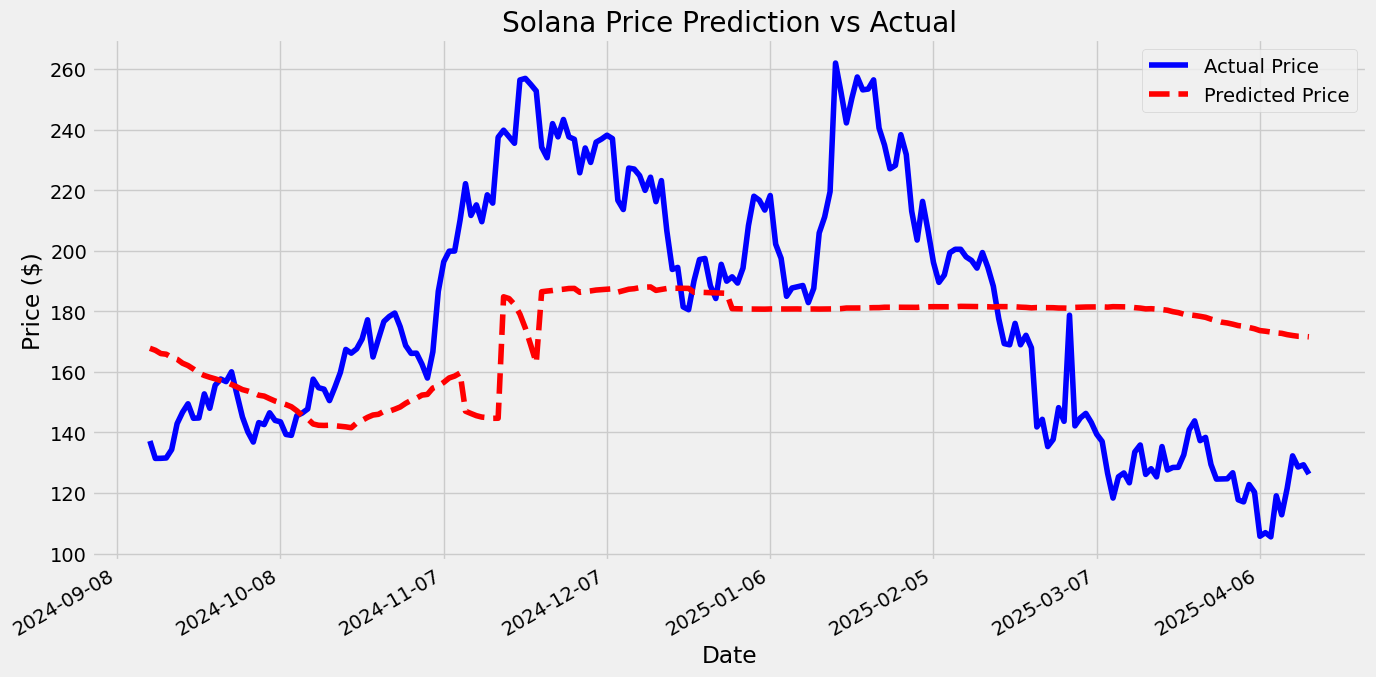


Top 10 Largest Prediction Errors:
                         Date  Predicted_Price  Actual_Price  Difference  \
204 2025-04-06 00:00:00+00:00       173.625031    105.709999   67.915031   
206 2025-04-08 00:00:00+00:00       173.145004    105.509995   67.635010   
205 2025-04-07 00:00:00+00:00       173.417297    106.899994   66.517303   
177 2025-03-10 00:00:00+00:00       181.520630    118.320007   63.200623   
208 2025-04-10 00:00:00+00:00       172.714600    112.800003   59.914597   
201 2025-04-03 00:00:00+00:00       175.057495    117.060005   57.997490   
200 2025-04-02 00:00:00+00:00       175.277679    117.760002   57.517677   
180 2025-03-13 00:00:00+00:00       181.432800    123.370003   58.062798   
207 2025-04-09 00:00:00+00:00       172.874130    119.059998   53.814133   
203 2025-04-05 00:00:00+00:00       174.230652    120.260002   53.970650   

     Difference_Pct  
204       64.246552  
206       64.102943  
205       62.223862  
177       53.414993  
208       53.11577

In [174]:
# Calculate overall metrics
print("\nOverall Metrics:")
mae = np.mean(np.abs(results_df['Difference']))
rmse = np.sqrt(np.mean(results_df['Difference'] ** 2))
mape = np.mean(np.abs(results_df['Difference_Pct']))

print(f"MAE: ${mae:.2f}")
print(f"RMSE: ${rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

# Create a visualization (even if dates are not available)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(14, 7))

# Use date for x-axis if available, otherwise use time_idx
if 'Date' in results_df.columns and not results_df['Date'].isna().all():
    x_values = results_df['Date']
    x_label = 'Date'
    # Format x-axis to show dates nicely
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
    plt.gcf().autofmt_xdate()
else:
    x_values = results_df['time_idx']
    x_label = 'Time Index'

plt.plot(x_values, results_df['Actual_Price'], label='Actual Price', color='blue')
plt.plot(x_values, results_df['Predicted_Price'], label='Predicted Price', color='red', linestyle='--')
plt.title('Solana Price Prediction vs Actual')
plt.xlabel(x_label)
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('solana_price_prediction.png')
plt.show()

# Additional analysis: Print the top 10 largest prediction errors
print("\nTop 10 Largest Prediction Errors:")
largest_errors = results_df.sort_values('Difference_Pct', key=abs, ascending=False).head(10)
print(largest_errors[['Date', 'Predicted_Price', 'Actual_Price', 'Difference', 'Difference_Pct']])

In [159]:
# Calculate MAE and RMSE
mae = np.mean(np.abs(all_predictions - all_targets))
rmse = np.sqrt(np.mean((all_predictions - all_targets) ** 2))
print(f"Manual MAE: {mae:.5f}")
print(f"Manual RMSE: {rmse:.5f}")

Manual MAE: 0.31304
Manual RMSE: 0.37516


In [160]:
# # Calculate quantile loss for 0.1 and 0.9 quantiles
# quantiles = [0.1, 0.9]
# quantile_loss_fn = QuantileLoss(quantiles=quantiles)
# # Use the last batch's preds/y for demonstration; for full validation, aggregate all quantiles
# quantile_preds = outputs[..., [0, -1]].cpu()
# quantile_targets = y.cpu()
# quantile_loss_value = quantile_loss_fn(quantile_preds, quantile_targets).item()
# print(f"Manual Quantile Loss (0.1, 0.9): {quantile_loss_value:.5f}")

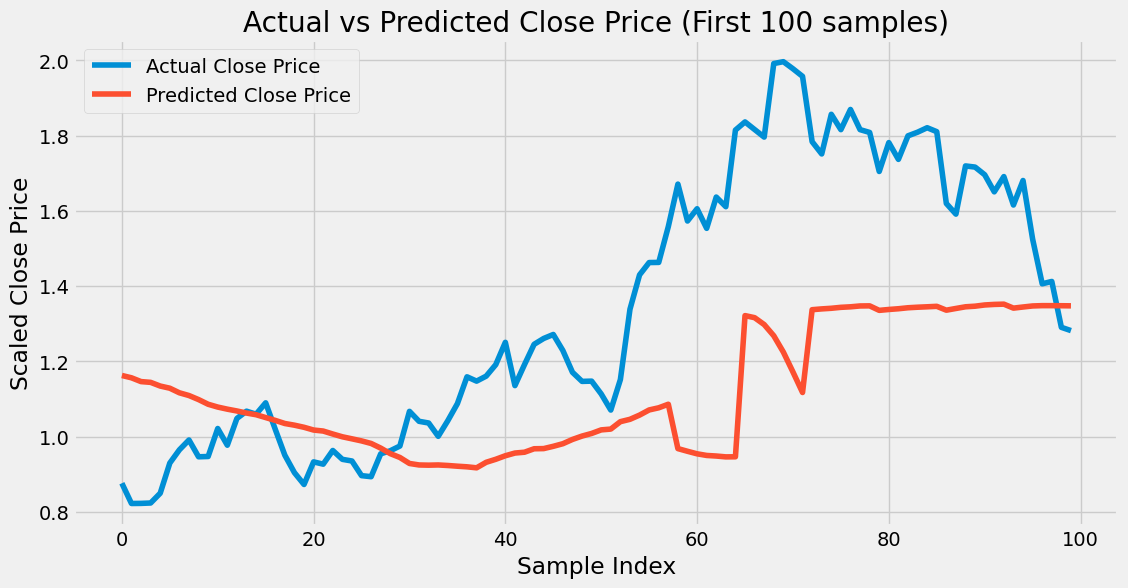

In [118]:
# 3. Example Output Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(all_targets[:100], label='Actual Close Price')
plt.plot(all_predictions[:100], label='Predicted Close Price')
plt.title('Actual vs Predicted Close Price (First 100 samples)')
plt.xlabel('Sample Index')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.show()